In [14]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Define the filenames and subset file
condition1_file = "GRF-GIF_Citris_vs_Control.tsv"
condition2_file = "GRF-GIF_Vitis_miR_vs_Control.tsv"
condition3_file = "GRF-GIF_Vitis_vs_Control.tsv"
condition4_file = "GRF-GIF_Wheat_vs_Control.tsv"
subset_file = "shared_DEG_names.txt"
output_file = "shared_DEG_log2FC.tsv"

In [16]:
# Load subset gene names into a set
with open(subset_file, "r") as subset:
    subset_genes = set(line.strip() for line in subset)

In [17]:
# Create an empty dataframe
output_df = pd.DataFrame(columns=["GeneID"])

In [18]:
# Process each condition file and extract fold change values for subset genes
for condition_file, condition_name in zip(
    [condition1_file, condition2_file, condition3_file, condition4_file],
    ["Cc GRF-GIF", "Vv miR GRF-GIF", "Vv GRF-GIF", "Ta GRF-GIF"]
):
    df = pd.read_csv(condition_file, delim_whitespace=True)
    subset_df = df[df["GeneID"].isin(subset_genes)]
    subset_df = subset_df[["GeneID", "log2FC"]]
    subset_df.rename(columns={"log2FC": condition_name}, inplace=True)

    # Merge the current condition's fold change values with the output dataframe
    output_df = pd.merge(output_df, subset_df, on="GeneID", how="outer")


In [19]:
# Rename headers
output_df = output_df[["GeneID", "Cc GRF-GIF", "Vv GRF-GIF", "Vv miR GRF-GIF", "Ta GRF-GIF"]]
output_df.head()

,GeneID,Cc GRF-GIF,Vv GRF-GIF,Vv miR GRF-GIF,Ta GRF-GIF
0,FvH4_2g19350.t1,-4.359492,-1.429343,-2.112222,-4.330123
1,FvH4_5g20950.t1,4.051186,3.556857,1.971560,0.326275
2,FvH4_4g29850.t1,-1.771096,-0.978740,-1.303613,-0.846682
3,FvH4_4g01980.t1,-1.805709,-0.845350,-0.653958,-1.765846
4,FvH4_6g11683.t1,-3.160731,-0.966258,-2.050992,-2.400925


In [20]:
# Set GeneID as index
output_df.set_index("GeneID", inplace=True)
output_df

,Cc GRF-GIF,Vv GRF-GIF,Vv miR GRF-GIF,Ta GRF-GIF
GeneID,,,,
FvH4_2g19350.t1,-4.359492,-1.429343,-2.112222,-4.330123
FvH4_5g20950.t1,4.051186,3.556857,1.971560,0.326275
FvH4_4g29850.t1,-1.771096,-0.978740,-1.303613,-0.846682
FvH4_4g01980.t1,-1.805709,-0.845350,-0.653958,-1.765846
FvH4_6g11683.t1,-3.160731,-0.966258,-2.050992,-2.400925
...,...,...,...,...
FvH4_2g23780.t1,-0.285078,0.437892,3.412948,2.987070
FvH4_5g16920.t1,-0.247970,0.188334,2.619843,2.559856
FvH4_3g21550.t1,0.119411,-3.698161,-2.133256,-3.287095


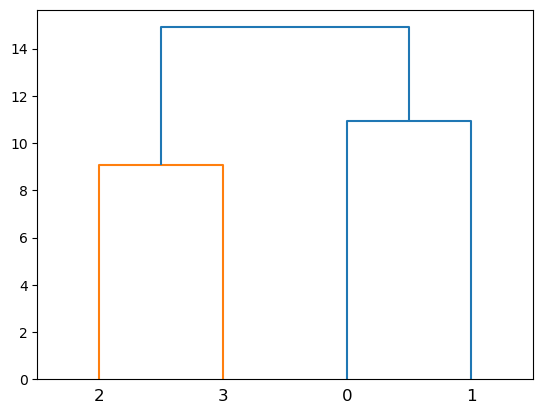

In [21]:
# Visualise sample hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram

link = linkage(output_df.T)
link
_ = dendrogram(link)

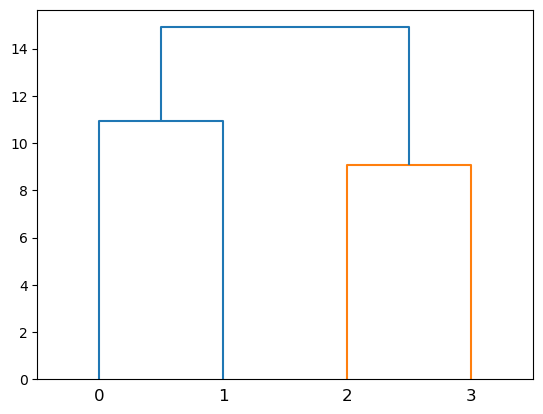

In [22]:
# Switch order so control is first
link[2][[0, 1]] = link[2][[1, 0]]
_ = dendrogram(link)

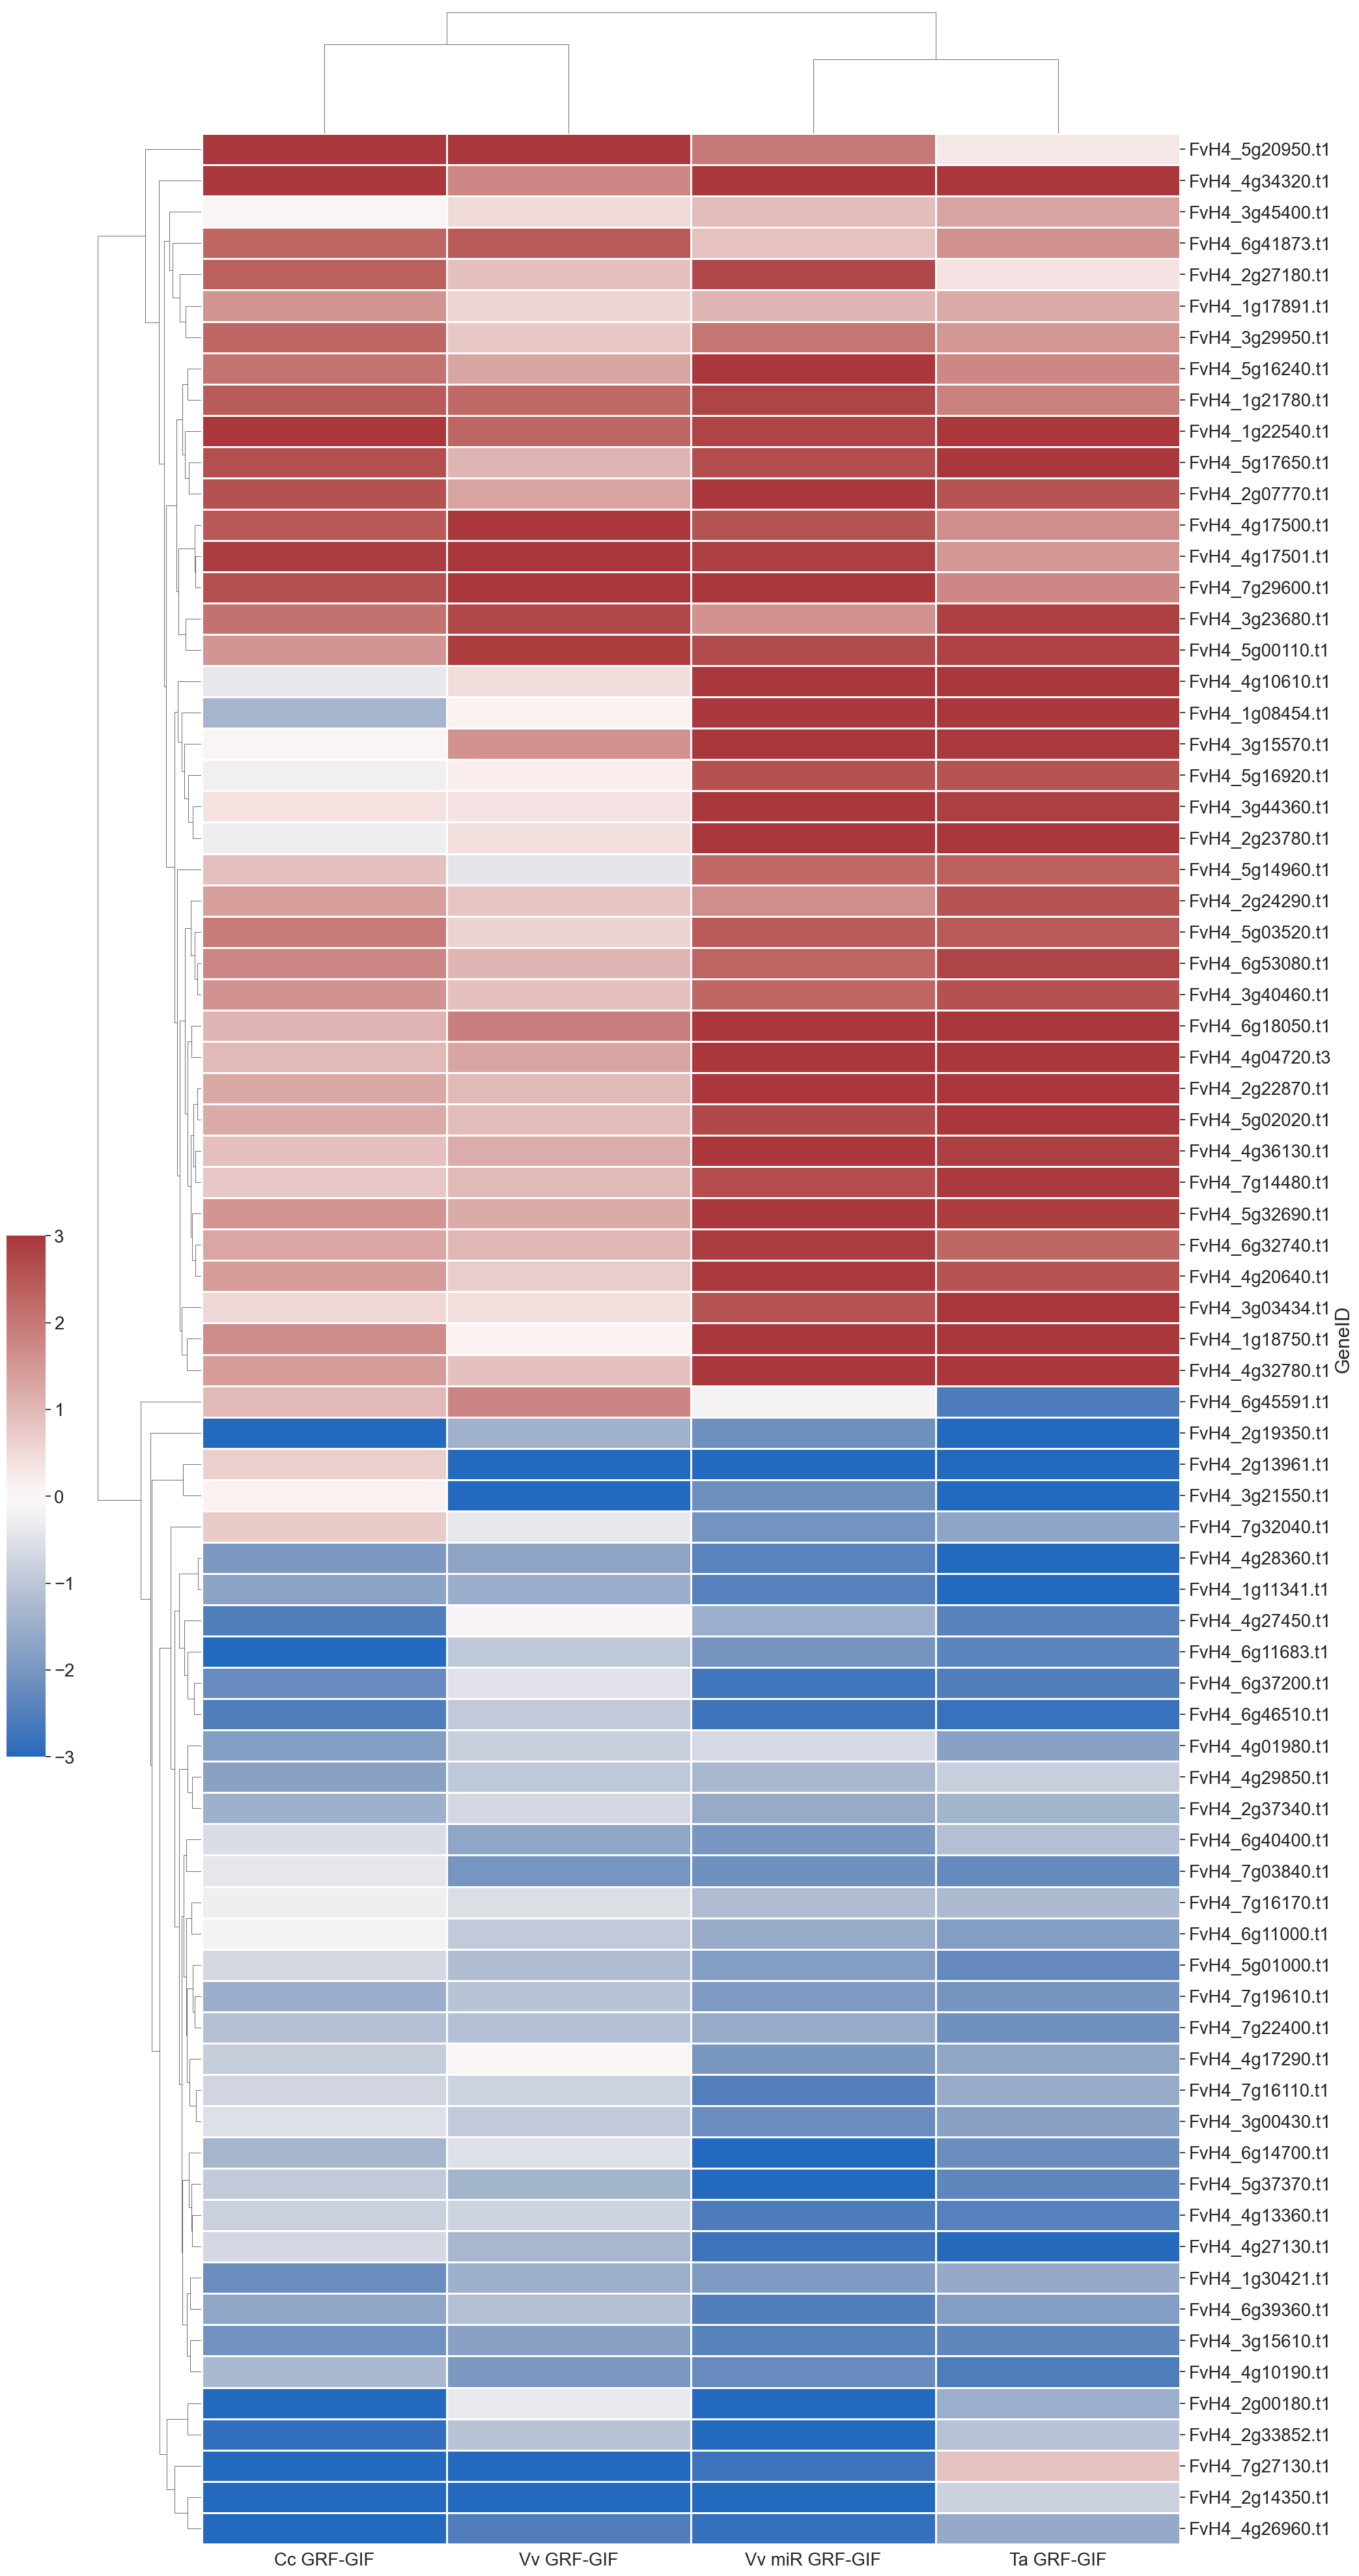

In [23]:
# Plot heatmap
sns.set(font_scale=1.8)
shared_heatmap = sns.clustermap(output_df, center=0, cmap="vlag", vmin=-3, vmax=3,
                   dendrogram_ratio=(.1, .05),
                   row_cluster = True, col_linkage=link,
                   cbar_pos=(-0.05, .32, .03, .2),
                   linewidths=.75, figsize=(20, 40))

shared_heatmap

In [24]:
shared_heatmap.savefig('Shared DEGs Heatmap.pdf')

In [25]:
import scipy.cluster.hierarchy as sch

# retrieve clusters using fcluster 
d = sch.distance.pdist(output_df)
L = sch.linkage(d, method='complete')

# 0.2 can be modified to retrieve more stringent or relaxed clusters
clusters = sch.fcluster(L, 0.35*d.max(), 'distance')

# clusters indicices correspond to incides of original df
for i,cluster in enumerate(clusters):
    print(output_df.index[i], cluster)

FvH4_2g19350.t1 8
FvH4_5g20950.t1 4
FvH4_4g29850.t1 8
FvH4_4g01980.t1 8
FvH4_6g11683.t1 8
FvH4_2g00180.t1 8
FvH4_2g27180.t1 1
FvH4_4g34320.t1 3
FvH4_1g17891.t1 1
FvH4_4g27450.t1 8
FvH4_1g22540.t1 3
FvH4_1g30421.t1 8
FvH4_5g16240.t1 3
FvH4_7g27130.t1 7
FvH4_5g17650.t1 3
FvH4_3g29950.t1 1
FvH4_4g17501.t1 3
FvH4_6g41873.t1 3
FvH4_2g14350.t1 7
FvH4_1g21780.t1 3
FvH4_4g26960.t1 7
FvH4_2g07770.t1 3
FvH4_2g37340.t1 8
FvH4_2g33852.t1 8
FvH4_4g17500.t1 3
FvH4_3g15610.t1 8
FvH4_6g37200.t1 8
FvH4_7g29600.t1 3
FvH4_6g39360.t1 8
FvH4_6g46510.t1 8
FvH4_4g28360.t1 8
FvH4_6g53080.t1 2
FvH4_3g23680.t1 3
FvH4_7g19610.t1 8
FvH4_5g03520.t1 2
FvH4_2g24290.t1 2
FvH4_7g22400.t1 8
FvH4_1g11341.t1 8
FvH4_6g45591.t1 5
FvH4_3g40460.t1 2
FvH4_4g10190.t1 8
FvH4_6g14700.t1 8
FvH4_5g00110.t1 3
FvH4_1g18750.t1 2
FvH4_5g32690.t1 2
FvH4_6g32740.t1 2
FvH4_4g20640.t1 2
FvH4_1g08454.t1 2
FvH4_4g17290.t1 5
FvH4_4g32780.t1 2
FvH4_7g32040.t1 5
FvH4_2g22870.t1 2
FvH4_7g16110.t1 5
FvH4_5g02020.t1 2
FvH4_6g40400.t1 5
FvH4_5g149

In [26]:
# Clusters based on 0.4*d.max()

cluster_1 = ['FvH4_2g27180.t1','FvH4_1g17891.t1','FvH4_3g29950.t1','FvH4_6g53080.t1','FvH4_5g03520.t1','FvH4_2g24290.t1',
             'FvH4_3g40460.t1','FvH4_1g18750.t1','FvH4_5g32690.t1','FvH4_6g32740.t1','FvH4_4g20640.t1','FvH4_1g08454.t1',
             'FvH4_4g32780.t1','FvH4_2g22870.t1','FvH4_5g02020.t1','FvH4_5g14960.t1','FvH4_6g18050.t1','FvH4_4g04720.t3',
             'FvH4_4g36130.t1','FvH4_7g14480.t1','FvH4_3g03434.t1','FvH4_4g10610.t1','FvH4_3g44360.t1','FvH4_2g23780.t1',
             'FvH4_5g16920.t1','FvH4_3g45400.t1','FvH4_3g15570.t1']

cluster_2 = ['FvH4_5g20950.t1','FvH4_4g34320.t1','FvH4_1g22540.t1','FvH4_5g16240.t1','FvH4_5g17650.t1','FvH4_4g17501.t1',
             'FvH4_6g41873.t1','FvH4_1g21780.t1','FvH4_2g07770.t1','FvH4_4g17500.t1','FvH4_7g29600.t1','FvH4_3g23680.t1',
             'FvH4_5g00110.t1']

cluster_3 = ['FvH4_6g45591.t1','FvH4_4g17290.t1','FvH4_7g32040.t1','FvH4_7g16110.t1','FvH4_6g40400.t1','FvH4_5g01000.t1',
             'FvH4_3g00430.t1','FvH4_7g16170.t1','FvH4_7g03840.t1','FvH4_6g11000.t1']

cluster_4 = ['FvH4_2g13961.t1','FvH4_3g21550.t1']

cluster_5 = ['FvH4_7g27130.t1','FvH4_2g14350.t1','FvH4_4g26960.t1']

cluster_6 = ['FvH4_2g19350.t1','FvH4_4g29850.t1','FvH4_4g01980.t1','FvH4_6g11683.t1','FvH4_2g00180.t1','FvH4_4g27450.t1',
             'FvH4_1g30421.t1','FvH4_2g37340.t1','FvH4_2g33852.t1','FvH4_3g15610.t1','FvH4_6g37200.t1','FvH4_6g39360.t1',
             'FvH4_6g46510.t1','FvH4_4g28360.t1','FvH4_7g19610.t1','FvH4_7g22400.t1','FvH4_1g11341.t1','FvH4_4g10190.t1',
             'FvH4_6g14700.t1','FvH4_5g37370.t1','FvH4_4g13360.t1','FvH4_4g27130.t1']



In [27]:
# Convert data from wide to long format
shared_long = output_df.melt(ignore_index=False).reset_index()
shared_long.set_index(['GeneID'], inplace=True)
shared_long.rename(columns={"variable": "Condition", "value": "log2FC"}, inplace=True)
shared_long

,Condition,log2FC
GeneID,,
FvH4_2g19350.t1,Cc GRF-GIF,-4.359492
FvH4_5g20950.t1,Cc GRF-GIF,4.051186
FvH4_4g29850.t1,Cc GRF-GIF,-1.771096
FvH4_4g01980.t1,Cc GRF-GIF,-1.805709
FvH4_6g11683.t1,Cc GRF-GIF,-3.160731
...,...,...
FvH4_2g23780.t1,Ta GRF-GIF,2.987070
FvH4_5g16920.t1,Ta GRF-GIF,2.559856
FvH4_3g21550.t1,Ta GRF-GIF,-3.287095


In [28]:
# Extract data for clusters
c1_df = shared_long.loc[cluster_1]
c2_df = shared_long.loc[cluster_2]
c3_df = shared_long.loc[cluster_3]
c4_df = shared_long.loc[cluster_4]
c5_df = shared_long.loc[cluster_5]
c6_df = shared_long.loc[cluster_6]

In [29]:
# Clusters based on 0.35*d.max()

c1a = ['FvH4_2g27180.t1','FvH4_1g17891.t1','FvH4_3g29950.t1','FvH4_5g14960.t1','FvH4_3g45400.t1']

c2a = ['FvH4_6g53080.t1','FvH4_5g03520.t1','FvH4_2g24290.t1','FvH4_3g40460.t1','FvH4_1g18750.t1','FvH4_5g32690.t1',
       'FvH4_6g32740.t1','FvH4_4g20640.t1','FvH4_1g08454.t1','FvH4_4g32780.t1','FvH4_2g22870.t1','FvH4_5g02020.t1',
       'FvH4_6g18050.t1','FvH4_4g04720.t3','FvH4_4g36130.t1','FvH4_7g14480.t1','FvH4_3g03434.t1','FvH4_4g10610.t1',
       'FvH4_3g44360.t1','FvH4_2g23780.t1','FvH4_5g16920.t1','FvH4_3g15570.t1']

c3a = ['FvH4_4g34320.t1','FvH4_1g22540.t1','FvH4_5g16240.t1','FvH4_5g17650.t1','FvH4_4g17501.t1','FvH4_6g41873.t1',
       'FvH4_1g21780.t1','FvH4_2g07770.t1','FvH4_4g17500.t1','FvH4_7g29600.t1','FvH4_3g23680.t1','FvH4_5g00110.t1']

c4a = ['FvH4_5g20950.t1']

c5a = ['FvH4_6g45591.t1','FvH4_4g17290.t1','FvH4_7g32040.t1','FvH4_7g16110.t1','FvH4_6g40400.t1','FvH4_5g01000.t1',
       'FvH4_3g00430.t1','FvH4_7g16170.t1','FvH4_7g03840.t1','FvH4_6g11000.t1']

c6a = ['FvH4_2g13961.t1','FvH4_3g21550.t1']

c7a = ['FvH4_7g27130.t1','FvH4_2g14350.t1','FvH4_4g26960.t1']

c8a = ['FvH4_2g19350.t1','FvH4_4g29850.t1','FvH4_4g01980.t1','FvH4_6g11683.t1','FvH4_2g00180.t1','FvH4_4g27450.t1',
       'FvH4_1g30421.t1','FvH4_2g37340.t1','FvH4_2g33852.t1','FvH4_3g15610.t1','FvH4_6g37200.t1','FvH4_6g39360.t1',
       'FvH4_6g46510.t1','FvH4_4g28360.t1','FvH4_7g19610.t1','FvH4_7g22400.t1','FvH4_1g11341.t1','FvH4_4g10190.t1',
       'FvH4_6g14700.t1','FvH4_5g37370.t1','FvH4_4g13360.t1','FvH4_4g27130.t1']

# Extract data for clusters
c1a_df = shared_long.loc[c1a]
c2a_df = shared_long.loc[c2a]
c3a_df = shared_long.loc[c3a]
c4a_df = shared_long.loc[c4a]
c5a_df = shared_long.loc[c5a]
c6a_df = shared_long.loc[c6a]
c7a_df = shared_long.loc[c7a]
c8a_df = shared_long.loc[c8a]

<Axes: xlabel='Condition', ylabel='log2FC'>

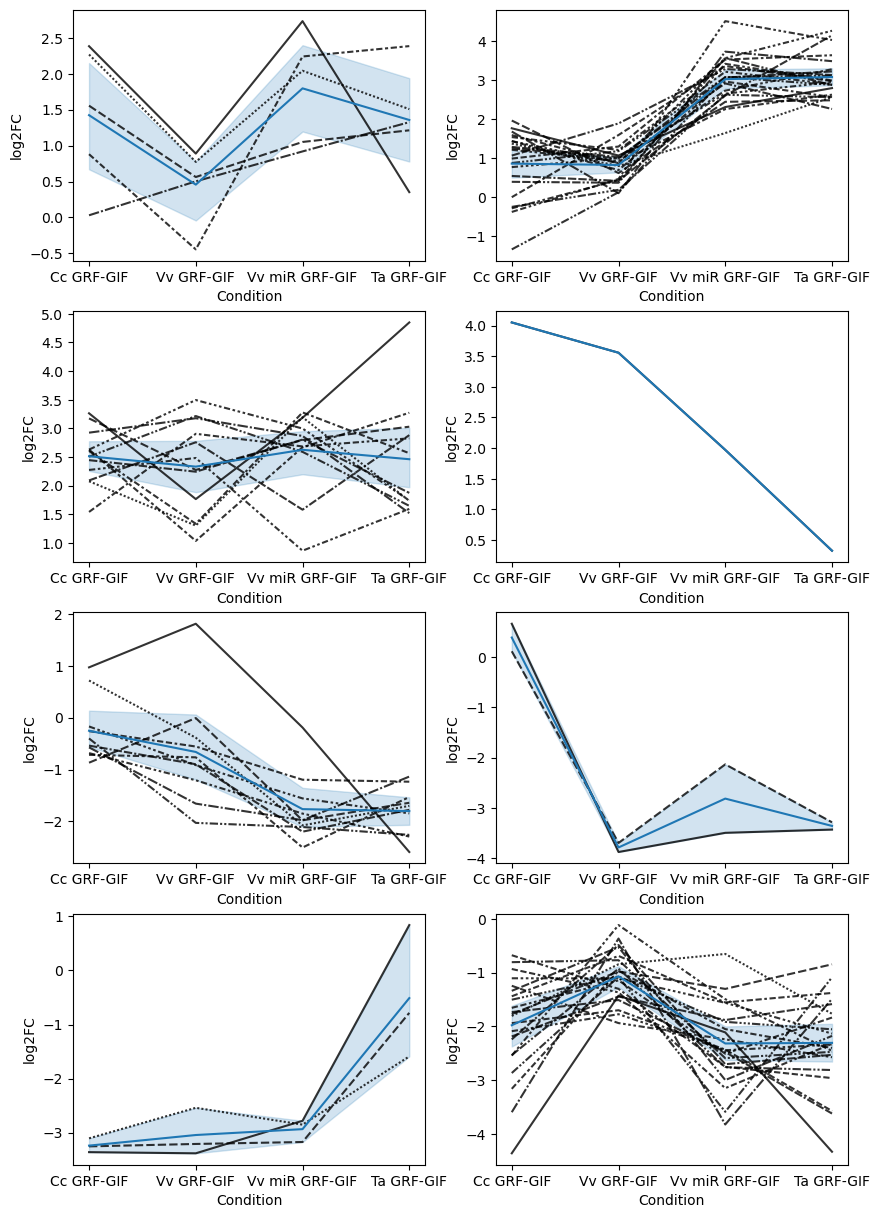

In [30]:
plt.figure(figsize=(10, 15))
plt.style.use('default')

plt.subplot(421)
sns.lineplot(data=c1a_df, x="Condition", y="log2FC", style="GeneID", color='black', alpha=0.8, legend=False)
sns.lineplot(data=c1a_df, x="Condition", y="log2FC")

plt.subplot(422)
sns.lineplot(data=c2a_df, x="Condition", y="log2FC", style="GeneID", color='black', alpha=0.8, legend=False)
sns.lineplot(data=c2a_df, x="Condition", y="log2FC")

plt.subplot(423)
sns.lineplot(data=c3a_df, x="Condition", y="log2FC", style="GeneID", color='black', alpha=0.8, legend=False)
sns.lineplot(data=c3a_df, x="Condition", y="log2FC")

plt.subplot(424)
sns.lineplot(data=c4a_df, x="Condition", y="log2FC", style="GeneID", color='black', alpha=0.8, legend=False)
sns.lineplot(data=c4a_df, x="Condition", y="log2FC")

plt.subplot(425)
sns.lineplot(data=c5a_df, x="Condition", y="log2FC", style="GeneID", color='black', alpha=0.8, legend=False)
sns.lineplot(data=c5a_df, x="Condition", y="log2FC")

plt.subplot(426)
sns.lineplot(data=c6a_df, x="Condition", y="log2FC", style="GeneID", color='black', alpha=0.8, legend=False)
sns.lineplot(data=c6a_df, x="Condition", y="log2FC")

plt.subplot(427)
sns.lineplot(data=c7a_df, x="Condition", y="log2FC", style="GeneID", color='black', alpha=0.8, legend=False)
sns.lineplot(data=c7a_df, x="Condition", y="log2FC")

plt.subplot(428)
sns.lineplot(data=c8a_df, x="Condition", y="log2FC", style="GeneID", color='black', alpha=0.8, legend=False)
sns.lineplot(data=c8a_df, x="Condition", y="log2FC")


In [31]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [32]:
# Clusters chosen by AK
ak_c1 = ['FvH4_4g10610.t1','FvH4_1g08454.t1','FvH4_3g15570.t1','FvH4_5g16920.t1','FvH4_3g44360.t1','FvH4_2g23780.t1']

ak_c2 = ['FvH4_2g00180.t1','FvH4_2g33852.t1','FvH4_7g27130.t1','FvH4_2g14350.t1','FvH4_4g26960.t1']

# Extract data for clusters
ak_c1_df = shared_long.loc[ak_c1]
ak_c2_df = shared_long.loc[ak_c2]

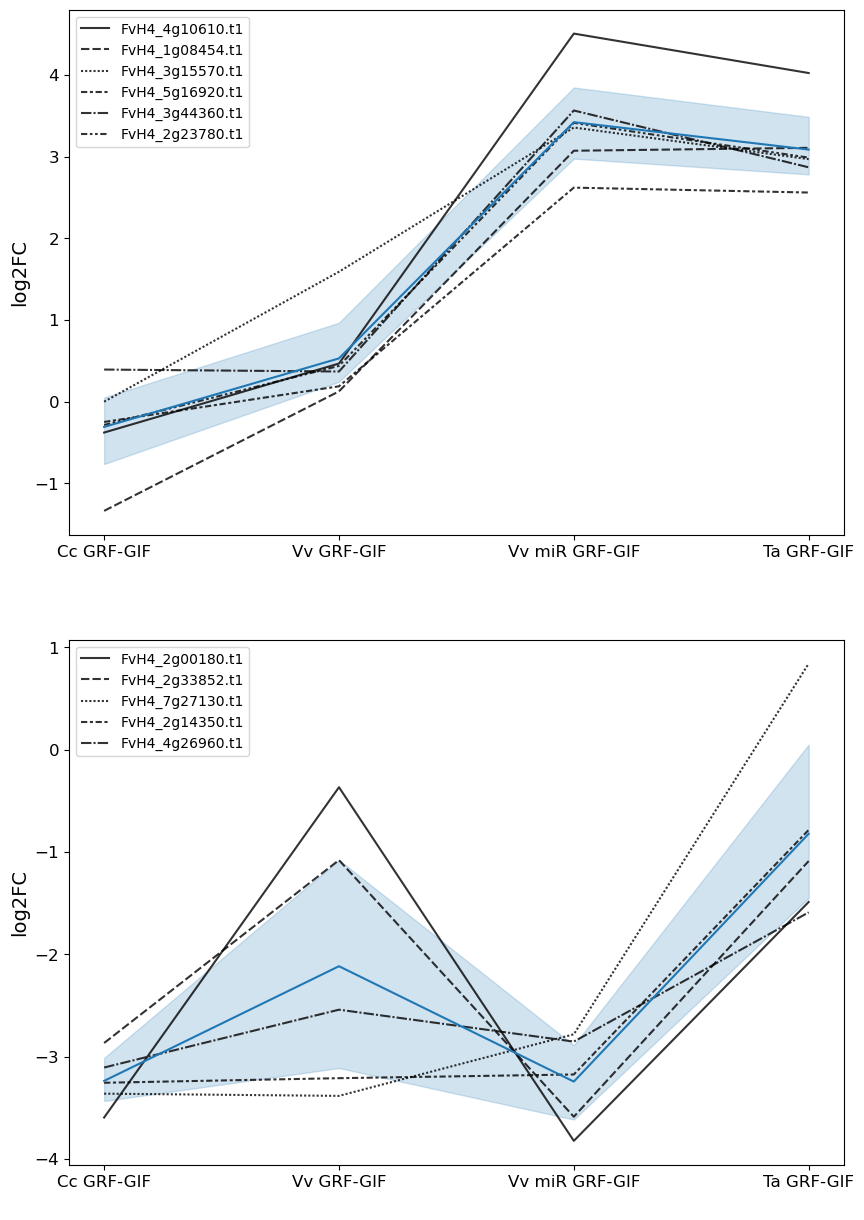

In [33]:
plt.figure(figsize=(10, 15))
plt.style.use('default')

plt.subplot(211)
ak_c1_plot = sns.lineplot(data=ak_c1_df, x="Condition", y="log2FC", style="GeneID", color='black', alpha=0.8, legend="brief")
sns.lineplot(data=ak_c1_df, x="Condition", y="log2FC")
ak_c1_plot.set_xlabel(' ', fontsize= 12)
ak_c1_plot.set_ylabel('log2FC', fontsize= 14)
ak_c1_plot.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(212)
ak_c2_plot = sns.lineplot(data=ak_c2_df, x="Condition", y="log2FC", style="GeneID", color='black', alpha=0.8, legend="brief")
sns.lineplot(data=ak_c2_df, x="Condition", y="log2FC")
ak_c2_plot.set_xlabel(' ', fontsize= 12)
ak_c2_plot.set_ylabel('log2FC', fontsize= 14)
ak_c2_plot.tick_params(axis='both', which='major', labelsize=12)

plt.savefig('Gene Cluster Expression.pdf')